In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('teste2_dados_20k_v2.txt') as f:
    lines = f.readlines()

In [3]:
dados_lst=[]
freqs_lst=[]
for idx,line in enumerate(lines):
    medida = line.split(" DADOS ")
    dados_linha = np.fromstring(medida[1], dtype=int, sep=' ')
    if dados_linha.size==600:
        dados_lst.append(dados_linha)
        freqs_linha = medida[0].replace("******** ","").split(" -> ")
        freqs_lst.append(np.fromstring(freqs_linha[1], dtype=float, sep=' '))
    else:
        print(medida[0].replace("******** ",""))
        print(dados_linha.shape)

freqs = np.array(freqs_lst)
dados = np.array(dados_lst)

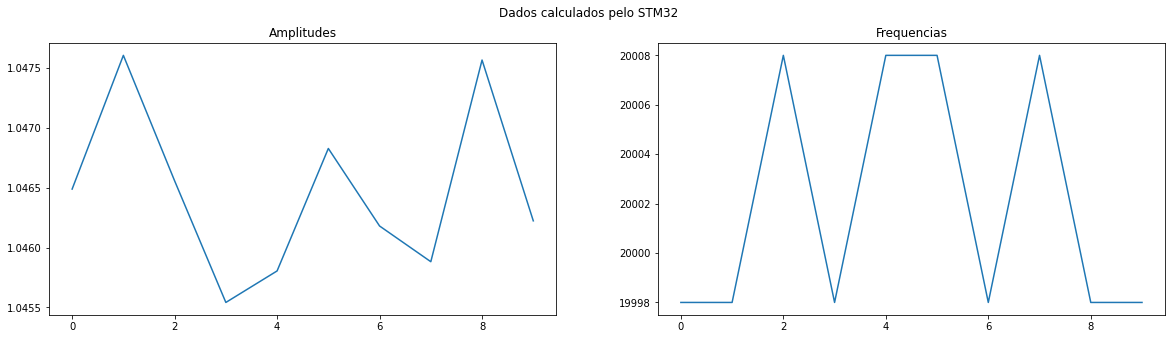

In [4]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(freqs[:,0])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs[:,1])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.suptitle('Dados calculados pelo STM32')
plt.show()


In [5]:
dados.shape

(10, 600)

In [6]:
linha = 6

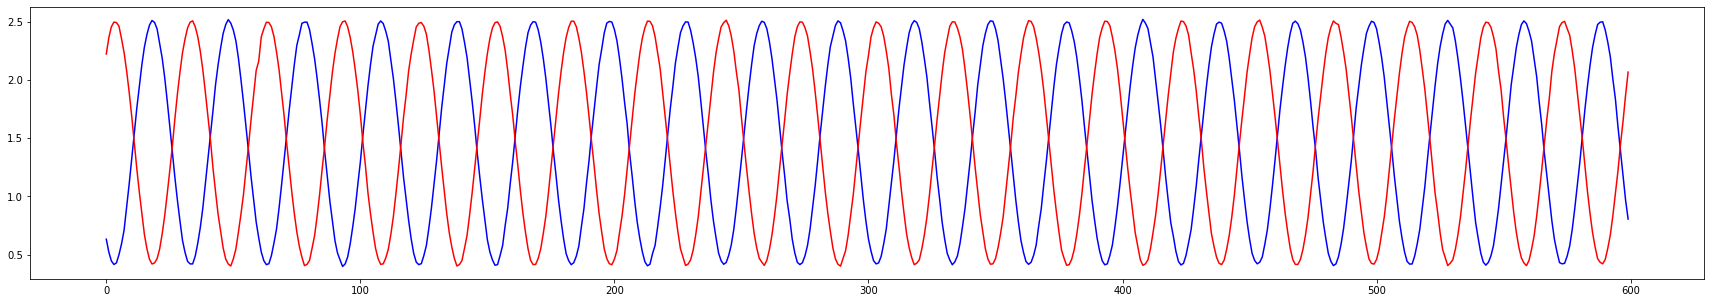

In [7]:
limite=600
k=3.3/4095
plt.figure(figsize=(30,5))
plt.plot(dados[linha,:limite]*k,'b-')
plt.plot(dados[0,:limite]*k,'r-')
plt.show()

In [8]:
# retorna apenas a componente da fft em uma única frequencia, fazendo a conta como se tivesse zeros a mais
def componente_precisa(sinal,frequencia,sample_freq, fator_zeros=100000):
    N = len(sinal)
    Ntotal = N*fator_zeros
    df = sample_freq/Ntotal
    k = np.round(frequencia/df)
    Freal = 0
    Fimag = 0
    for n in range(N):
        Freal += sinal[n]*np.cos(k*n*2*np.pi/Ntotal)
        Fimag += sinal[n]*np.sin(k*n*2*np.pi/Ntotal)
    Fj = np.sqrt(Freal**2 + Fimag**2)
    return Fj/(N/2)

In [9]:
# somatorio da fft sem usar complexo, retorna amplitude
def somaa(f,k):
    Freal = 0
    Fimag = 0
    N = len(f)
    for n in range(N):
        Freal += f[n]*np.cos(k*n*2*np.pi/N)
        Fimag += f[n]*np.sin(k*n*2*np.pi/N)
    Fj = np.sqrt(Freal**2 + Fimag**2)
    return Fj

In [10]:
# plota o meu gráfico da fft
def print_fft(sinal,sample_freq, completo = False):
    N = len(sinal)
    df = sample_freq/N
    print(f'df = {df}')
    ffty = np.zeros(N)
    for k in range(N):
        ffty[k] = somaa(sinal,k)
    xf = np.array(range(N))*df
    yf = ffty*2/N
    plt.figure(figsize=(30,5))
    if completo:
        plt.plot(xf,yf,'bx-')
    else:
        plt.plot(xf[0:int((N+1)/2)],yf[0:int((N+1)/2)],'bx-')
    plt.xlabel('Frequencia [Hz]')
    plt.ylabel('Amplitude')
    plt.grid()
    return ffty, df

df = 2000.0


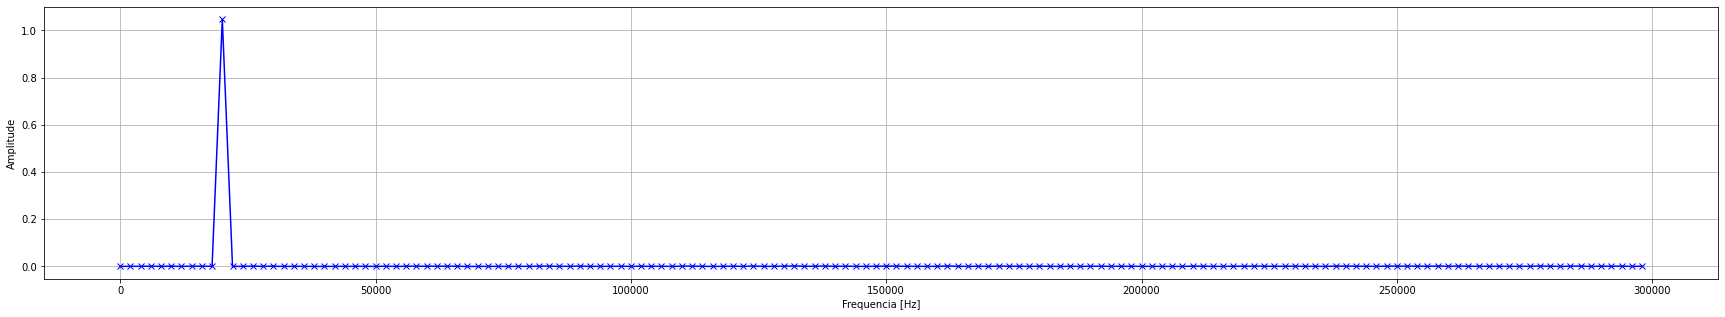

In [11]:
npontos = 300
ffty, df = print_fft((dados[linha,:npontos]-np.mean(dados[linha,:npontos]))*k,600000)

df = 1000.0


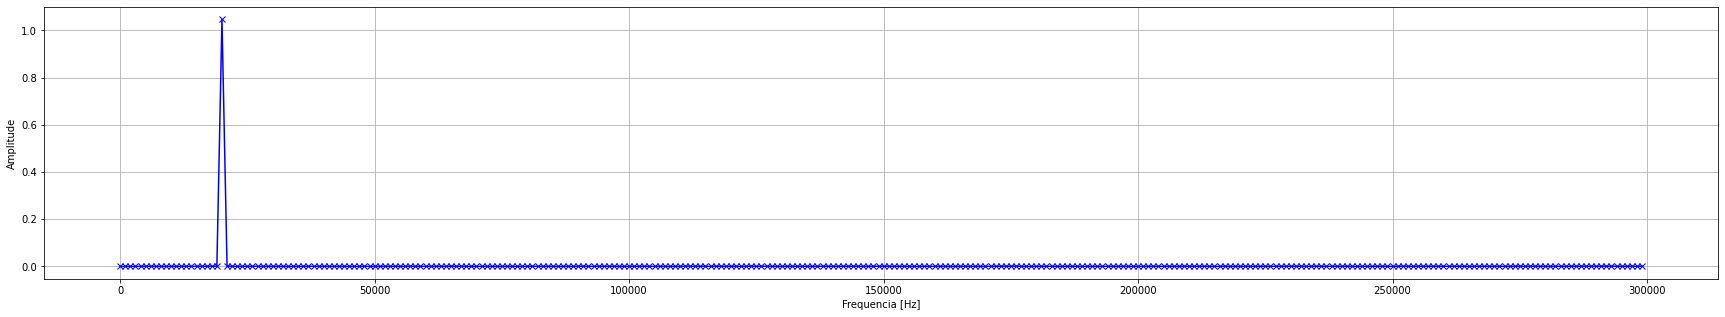

In [12]:
npontos = 600
ffty, df = print_fft((dados[linha,:npontos]-np.mean(dados[linha,:npontos]))*k,600000)

In [13]:
frequencia = 20000
sample_freq = 600000
npontos_range = range(60,600,10)
componentes = [componente_precisa((dados[linha,:npontos]-np.mean(dados[linha,:npontos]))*k,
                                  frequencia,sample_freq, fator_zeros=100000) for npontos in npontos_range]

Text(0, 0.5, 'Componente em f=20000Hz')

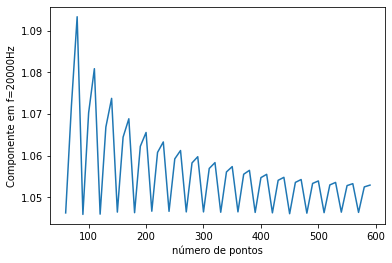

In [14]:
plt.plot(npontos_range,componentes)
plt.xlabel('número de pontos')
plt.ylabel(f'Componente em f={frequencia}Hz')

In [15]:
frequencia = 20000
sample_freq = 600000
npontos = 30
inicio_range = range(0,600-npontos-1,10)
componentes = [componente_precisa((dados[linha,inicio:inicio+npontos]-np.mean(dados[linha,inicio:inicio+npontos]))*k,frequencia,sample_freq, fator_zeros=100000) for inicio in inicio_range]

Text(0, 0.5, 'Componente em f=20000Hz')

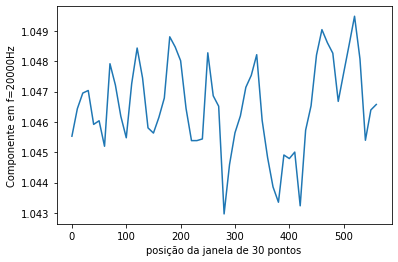

In [16]:
plt.plot(inicio_range,componentes)
plt.xlabel(f'posição da janela de {npontos} pontos')
plt.ylabel(f'Componente em f={frequencia}Hz')

In [17]:
frequencia_range = range(17000,22000,10)
sample_freq = 600000
inicio_pontos = 0
npontos = 300
componentes = [componente_precisa((dados[linha,inicio_pontos:inicio_pontos+npontos]-
                                   np.mean(dados[linha,inicio_pontos:inicio_pontos+npontos]))*k,
                                  frequencia_i,sample_freq, fator_zeros=100000) 
               for frequencia_i in frequencia_range]

In [18]:
frequencia_range2 = range(17000,22000,10)
sample_freq = 600000
npontos2 = 600
componentes2 = [componente_precisa((dados[linha,:npontos2]-np.mean(dados[linha,:npontos2]))*k,
                                   frequencia_i,sample_freq, fator_zeros=100000)
                for frequencia_i in frequencia_range2]

In [19]:
frequencia_range3 = range(17000,22000,10)
sample_freq = 600000
npontos3 = 60
componentes3 = [componente_precisa((dados[linha,:npontos3]-np.mean(dados[linha,:npontos3]))*k,
                                   frequencia_i,sample_freq, fator_zeros=100000)
                for frequencia_i in frequencia_range3]

In [20]:
frequencia_range4 = range(17000,22000,10)
sample_freq = 600000
npontos4 = 30
componentes4 = [componente_precisa((dados[linha,:npontos4]-np.mean(dados[linha,:npontos4]))*k,
                                   frequencia_i,sample_freq, fator_zeros=100000)
                for frequencia_i in frequencia_range4]

In [21]:
idx_pico = np.argmax(componentes)
print(idx_pico)

300


In [22]:
# olhando 300 pontos
for pontos in range(0,11,1):
    erro_perc = ((componentes[idx_pico]-componentes[idx_pico-pontos])/componentes[idx_pico])*100
    print(f'dif freq: {pontos}Hz\tErro: {erro_perc}%')

dif freq: 0Hz	Erro: 0.0%
dif freq: 1Hz	Erro: 0.003677479931881865%
dif freq: 2Hz	Erro: 0.015569216523855943%
dif freq: 3Hz	Erro: 0.035673389846363035%
dif freq: 4Hz	Erro: 0.06398696675243497%
dif freq: 5Hz	Erro: 0.10050570142922145%
dif freq: 6Hz	Erro: 0.14522413616224325%
dif freq: 7Hz	Erro: 0.19813560231298688%
dif freq: 8Hz	Erro: 0.2592322215092895%
dif freq: 9Hz	Erro: 0.32850490704747387%
dif freq: 10Hz	Erro: 0.4059433655074645%


In [23]:
# olhando 600 pontos
idx_pico = np.argmax(componentes2)
for pontos in range(0,10,1):
    erro_perc = ((componentes2[idx_pico]-componentes2[idx_pico-pontos])/componentes2[idx_pico])*100
    print(f'dif freq: {pontos}Hz\tErro: {erro_perc}%')

dif freq: 0Hz	Erro: 0.0%
dif freq: 1Hz	Erro: 0.012618107175019452%
dif freq: 2Hz	Erro: 0.05812340620042816%
dif freq: 3Hz	Erro: 0.13648874600436417%
dif freq: 4Hz	Erro: 0.2476675337160067%
dif freq: 5Hz	Erro: 0.3915937676474209%
dif freq: 6Hz	Erro: 0.5681820839414172%
dif freq: 7Hz	Erro: 0.7773278168479315%
dif freq: 8Hz	Erro: 1.018907072584088%
dif freq: 9Hz	Erro: 1.2927768167205298%


In [24]:
# olhando 60 pontos
idx_pico = np.argmax(componentes3)
for pontos in range(0,40,4):
    erro_perc = ((componentes3[idx_pico]-componentes3[idx_pico-pontos])/componentes3[idx_pico])*100
    print(f'dif freq: {pontos}Hz\tErro: {erro_perc}%')

dif freq: 0Hz	Erro: 0.0%
dif freq: 4Hz	Erro: 0.003146845545761137%
dif freq: 8Hz	Erro: 0.011460123590326304%
dif freq: 12Hz	Erro: 0.024938208634948663%
dif freq: 16Hz	Erro: 0.04357900383027301%
dif freq: 20Hz	Erro: 0.06737994146380277%
dif freq: 24Hz	Erro: 0.09633798349889372%
dif freq: 28Hz	Erro: 0.13044962216527456%
dif freq: 32Hz	Erro: 0.16971088060007544%
dif freq: 36Hz	Erro: 0.21411731354074437%


In [25]:
##RESULTADO BEM ESTRANHO
# olhando 30 pontos
idx_pico = np.argmax(componentes4)
for pontos in range(0,10,1):
    erro_perc = ((componentes4[idx_pico]-componentes4[idx_pico-pontos])/componentes4[idx_pico])*100
    print(f'dif freq: {pontos}Hz\tErro: {erro_perc}%')

dif freq: 0Hz	Erro: 0.0%
dif freq: 1Hz	Erro: 1.1019674804331395e-05%
dif freq: 2Hz	Erro: 9.846102202906906e-05%
dif freq: 3Hz	Erro: 0.00026231367403840346%
dif freq: 4Hz	Erro: 0.0005025671574186249%
dif freq: 5Hz	Erro: 0.0008192108926808155%
dif freq: 6Hz	Erro: 0.0012122341943882674%
dif freq: 7Hz	Erro: 0.0016816262714325534%
dif freq: 8Hz	Erro: 0.0022273762268424017%
dif freq: 9Hz	Erro: 0.0028494730579323485%


In [26]:
for idx,(c,f) in enumerate(zip(componentes,frequencia_range)):
    print(f'{idx}\t{c}\t{f}')

0	0.2226226459330323	17000
1	0.22332445791081829	17010
2	0.22397577115452844	17020
3	0.22457610145087065	17030
4	0.22512497171048224	17040
5	0.22562191207858143	17050
6	0.22606646004449962	17060
7	0.22645816055006818	17070
8	0.2267965660968394	17080
9	0.22708123685211623	17090
10	0.22731174075377125	17100
11	0.22748765361382733	17110
12	0.22760855922078255	17120
13	0.22767404944065409	17130
14	0.22768372431672185	17140
15	0.22763719216794484	17150
16	0.22753406968603698	17160
17	0.2273739820311717	17170
18	0.22715656292630437	17180
19	0.22688145475008203	17190
20	0.22654830862832553	17200
21	0.22615678452406718	17210
22	0.22570655132611103	17220
23	0.22519728693611374	17230
24	0.22462867835414932	17240
25	0.22400042176275364	17250
26	0.22331222260941677	17260
27	0.22256379568751555	17270
28	0.22175486521566024	17280
29	0.22088516491543922	17290
30	0.21995443808754933	17300
31	0.21896243768628418	17310
32	0.21790892639237366	17320
33	0.21679367668415045	17330
34	0.21561647090703243	1734

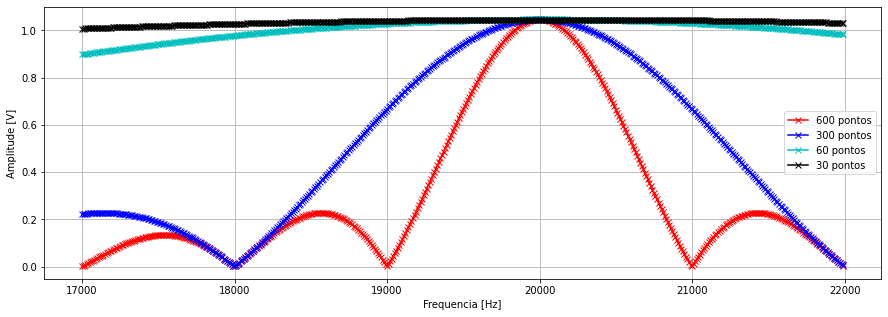

In [27]:
idx_pico = np.argmax(componentes)
idx_pico2 = np.argmax(componentes2)
idx_pico3 = np.argmax(componentes3)
idx_pico4 = np.argmax(componentes4)

plt.figure(figsize=(15,5))
plt.plot(frequencia_range2,componentes2,'rx-',label=f'{npontos2} pontos')
plt.plot(frequencia_range,componentes,'bx-',label=f'{npontos} pontos')
plt.plot(frequencia_range3,componentes3,'cx-',label=f'{npontos3} pontos')
plt.plot(frequencia_range4,componentes4,'kx-',label=f'{npontos4} pontos')



plt.ylabel(f'Amplitude [V]')
plt.xlabel(f'Frequencia [Hz]')
plt.legend()
plt.grid()

In [28]:
dados.shape[0]

10

In [29]:
frequencia = 19970
amplitudes10=np.zeros(dados.shape[0])
freqs10=np.zeros(dados.shape[0])
nframes=dados.shape[0]
x = range(dados.shape[0])
npontos2 = 300
for idx,frame in enumerate(range(nframes)):
    frequencia_range2 = range(frequencia-1000,frequencia+1000,10)
    sample_freq = 600000
    componentes2 = [componente_precisa((dados[frame,:npontos2]-np.mean(dados[frame,:npontos2]))*k,
                                       frequencia_i,sample_freq, fator_zeros=100000)
                    for frequencia_i in frequencia_range2]
    amplitudes10[idx] = np.max(componentes2)
    indice_pico = np.argmax(componentes2)
    frequenciaf = frequencia_range2[indice_pico]
    print(f'{frame}\t{amplitudes10[idx]}\t{frequenciaf}\t{componentes2[indice_pico-1]}\t{componentes2[indice_pico]}\t{componentes2[indice_pico+1]}')
    freqs10[idx] = frequenciaf

0	1.0466516839432949	20000	1.0466508274331874	1.0466516839432949	1.046566527522934
1	1.047894506198071	19980	1.047874981354707	1.047894506198071	1.0478277720516034
2	1.0470273439927307	20030	1.0470267130816941	1.0470273439927307	1.0469417316850744
3	1.046868027068635	20010	1.04685244088104	1.046868027068635	1.046797553395105
4	1.0474336854056001	20030	1.0474002814946783	1.0474336854056001	1.0473807857887079
5	1.0474185199739252	20030	1.0473872920525618	1.0474185199739252	1.0473634465139368
6	1.0465179753770757	20000	1.0464794898885477	1.0465179753770757	1.0464704908473015
7	1.046001801436894	20020	1.0459310950781928	1.046001801436894	1.0459863304344426
8	1.0474321483246243	20000	1.0474311374240726	1.0474321483246243	1.0473471157767391
9	1.0463457088412906	20010	1.046322327336808	1.0463457088412906	1.0462830888079935


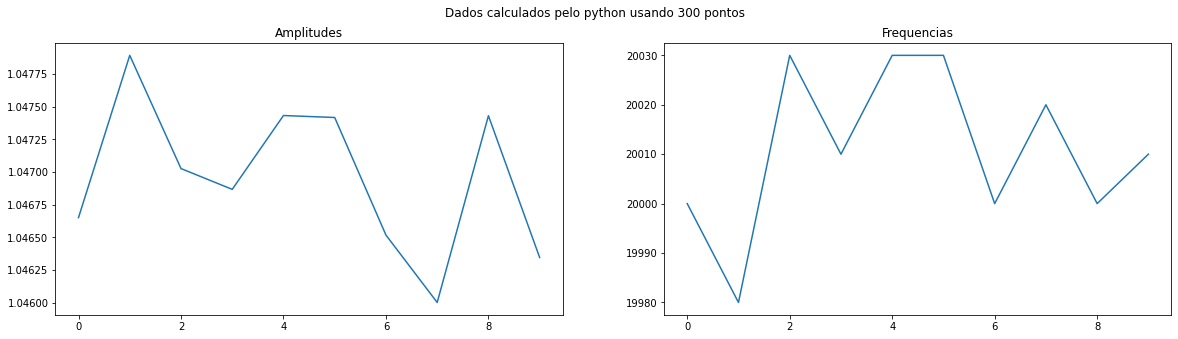

In [30]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(amplitudes10[:nframes])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs10[:nframes])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.suptitle('Dados calculados pelo python usando 300 pontos')
plt.show()

In [31]:
frequencia = 19970
amplitudes10=np.zeros(dados.shape[0])
freqs10=np.zeros(dados.shape[0])
nframes=dados.shape[0]
x = range(dados.shape[0])
npontos2 = 600
for idx,frame in enumerate(range(nframes)):
    frequencia_range2 = range(frequencia-1000,frequencia+1000,10)
    sample_freq = 600000
    componentes2 = [componente_precisa((dados[frame,:npontos2]-np.mean(dados[frame,:npontos2]))*k,
                                       frequencia_i,sample_freq, fator_zeros=100000)
                    for frequencia_i in frequencia_range2]
    amplitudes10[idx] = np.max(componentes2)
    indice_pico = np.argmax(componentes2)
    frequenciaf = frequencia_range2[indice_pico]
    print(f'{frame}\t{amplitudes10[idx]}\t{frequenciaf}\t{componentes2[indice_pico-1]}\t{componentes2[indice_pico]}\t{componentes2[indice_pico+1]}')
    freqs10[idx] = frequenciaf

0	1.0467339677107308	20000	1.046642821415764	1.0467339677107308	1.0464811085222947
1	1.0478801205520958	19990	1.047595534724271	1.0478801205520958	1.0478197968853866
2	1.0467873209076577	20010	1.0467741656537526	1.0467873209076577	1.0464559332898846
3	1.0458086379838343	20000	1.0456128305175956	1.0458086379838343	1.0456604702354346
4	1.0460401904713668	20010	1.0460030507214468	1.0460401904713668	1.0457328601568459
5	1.0470617192834537	20010	1.0470272877695739	1.0470617192834537	1.0467518996810896
6	1.0464340506427001	20000	1.0463020104726741	1.0464340506427001	1.0462218675683097
7	1.0461142451539596	20000	1.045775868952753	1.0461142451539596	1.046108537517503
8	1.047813904156251	20000	1.04771114548701	1.047813904156251	1.0475721659290589
9	1.0464911735888343	20000	1.0462895154041785	1.0464911735888343	1.0463485471686584


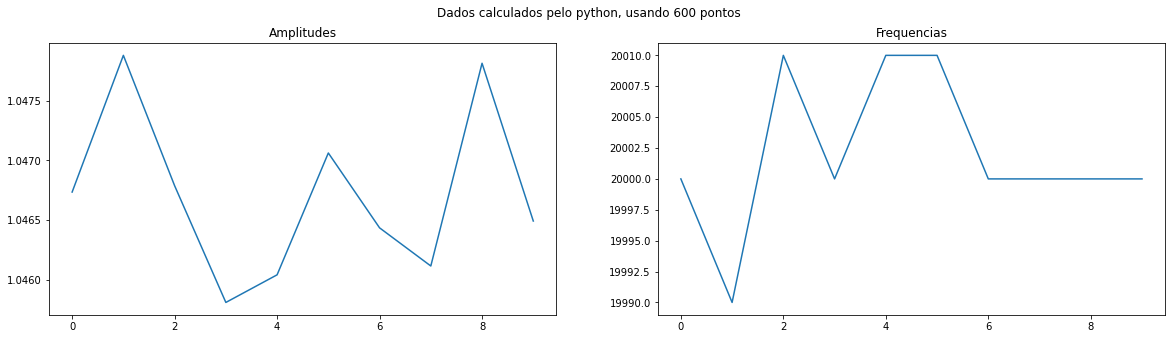

In [32]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(amplitudes10[:nframes])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs10[:nframes])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.suptitle('Dados calculados pelo python, usando 600 pontos')
plt.show()

In [33]:
frequencia = 19970
amplitudes10=np.zeros(dados.shape[0])
freqs10=np.zeros(dados.shape[0])
nframes=dados.shape[0]
x = range(dados.shape[0])
npontos2 = 600
for idx,frame in enumerate(range(nframes)):
    frequencia_range2 = range(frequencia-1000,frequencia+1000,10)
    sample_freq = 300000
    componentes2 = [componente_precisa((dados[frame,:npontos2:2]-np.mean(dados[frame,:npontos2:2]))*k,
                                       frequencia_i,sample_freq, fator_zeros=100000)
                    for frequencia_i in frequencia_range2]
    amplitudes10[idx] = np.max(componentes2)
    indice_pico = np.argmax(componentes2)
    frequenciaf = frequencia_range2[indice_pico]
    print(f'{frame}\t{amplitudes10[idx]}\t{frequenciaf}\t{componentes2[indice_pico-1]}\t{componentes2[indice_pico]}\t{componentes2[indice_pico+1]}')
    freqs10[idx] = frequenciaf

0	1.0463392719598847	20000	1.0462979565451551	1.0463392719598847	1.046036841555326
1	1.0473049814144777	19990	1.0470636019143433	1.0473049814144777	1.0472021072519186
2	1.046306329898156	20000	1.0459849069481486	1.046306329898156	1.0462835276082032
3	1.046341662482925	20000	1.0460978146901214	1.046341662482925	1.0462418770019737
4	1.0458569998038572	20010	1.0458079389260244	1.0458569998038572	1.0455615420495026
5	1.0480869727447513	20010	1.0480464052997864	1.0480869727447513	1.047782773030016
6	1.0466843928314329	20000	1.0466147783978035	1.0466843928314329	1.0464097289530405
7	1.0458111355659274	20010	1.0458018001578049	1.0458111355659274	1.0454763669747296
8	1.0479976308159311	20000	1.047962637062895	1.0479976308159311	1.0476881435052015
9	1.0467668444001257	20000	1.0466346100761181	1.0467668444001257	1.0465545083728605


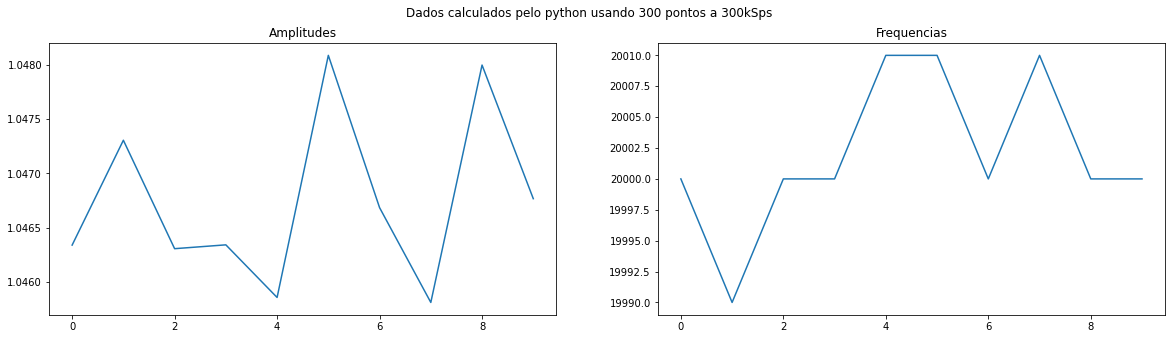

In [34]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(amplitudes10[:nframes])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs10[:nframes])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.suptitle('Dados calculados pelo python usando 300 pontos a 300kSps')
plt.show()

In [35]:
frequencia = 19970
amplitudes10=np.zeros(dados.shape[0])
freqs10=np.zeros(dados.shape[0])
nframes=dados.shape[0]
x = range(dados.shape[0])
downsampling = 5
npontos2 = 600
for idx,frame in enumerate(range(nframes)):
    frequencia_range2 = range(frequencia-1000,frequencia+1000,1)
    sample_freq = 600000/downsampling
    componentes2 = [componente_precisa((dados[frame,:npontos2:downsampling]-np.mean(dados[frame,:npontos2:downsampling]))*k,
                                       frequencia_i,sample_freq, fator_zeros=100000)
                    for frequencia_i in frequencia_range2]
    amplitudes10[idx] = np.max(componentes2)
    indice_pico = np.argmax(componentes2)
    frequenciaf = frequencia_range2[indice_pico]
    print(f'{frame}\t{amplitudes10[idx]}\t{frequenciaf}\t{componentes2[indice_pico-1]}\t{componentes2[indice_pico]}\t{componentes2[indice_pico+1]}')
    freqs10[idx] = frequenciaf

0	1.045250235164472	19992	1.0452482998462185	1.045250235164472	1.0452487344456411
1	1.0474815581180552	19989	1.0474786068107476	1.0474815581180552	1.0474810620612804
2	1.0467240193519274	20001	1.046721970851998	1.0467240193519274	1.0467226198615769
3	1.0465493582381578	20008	1.046547813387416	1.0465493582381578	1.0465474557597083
4	1.0448816232042395	20004	1.0448790324780506	1.0448816232042395	1.0448807770384605
5	1.0488406318701071	20005	1.0488377169019591	1.0488406318701071	1.048840095842282
6	1.0458165159076551	19992	1.0458153137927342	1.0458165159076551	1.045814276784196
7	1.044479450304064	20007	1.044476844821076	1.044479450304064	1.0444786215228004
8	1.0473027409999425	19991	1.0473012042460577	1.0473027409999425	1.047300836771775
9	1.0467061839554248	19994	1.046703119685725	1.0467061839554248	1.0467058053697313


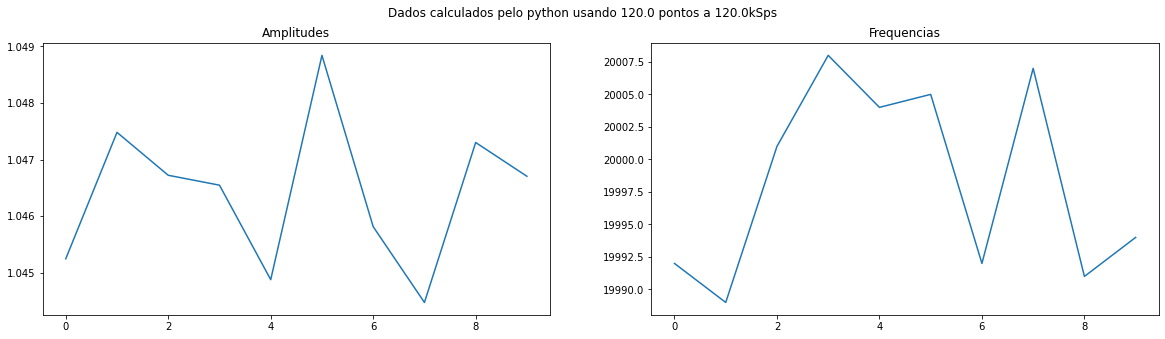

In [36]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(amplitudes10[:nframes])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs10[:nframes])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
freq_usada = sample_freq/1000
npontos_usado = npontos2/downsampling
plt.suptitle(f'Dados calculados pelo python usando {npontos_usado} pontos a {freq_usada}kSps')
plt.show()

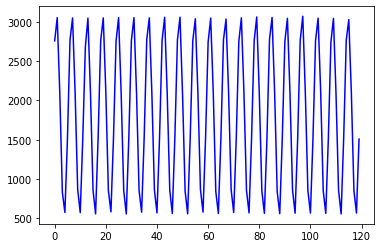

In [37]:
plt.plot(dados[0,:600:downsampling],'b') # amostrado a 300kSps

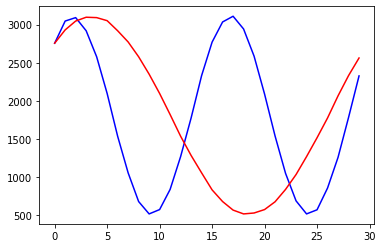

In [38]:
plt.plot(dados[0,:60:2],'b') # amostrado a 300kSps
plt.plot(dados[0,:30],'r') # amostrado a 600kSps